In [33]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
#Loading the data
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (1).csv


In [35]:
#Store the data
dataSet = df = pd.read_csv('framingham.csv')

In [36]:
#Get the shape of the data
dataSet.shape

(4238, 16)

In [37]:
#Description of the DataFrame
dataSet.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [38]:
dataSet.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
standardCorrelation = dataSet.corr()
print(standardCorrelation['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64


In [40]:
#Divide the data into X and y 
X=dataSet.drop(['education','TenYearCHD'], axis=1) #Drop 'education' as it is not an important feature for the prediction
y=dataSet['TenYearCHD']

In [41]:
#Check the empty values in each column
X.isna().any()


male               False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
dtype: bool

In [42]:
#Check the count of empty values in each column
X.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [43]:
#Replace all the missing values with mean and store it in X_clean
X_clean=X
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
si.fit(X[['BPMeds']])
pd.DataFrame(si.transform(X[['BPMeds']]))
si2=SimpleImputer(strategy='median')
si2.fit(X)
X_clean=pd.DataFrame(si2.transform(X_clean))
X_clean.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

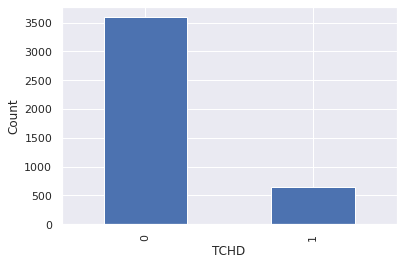

In [44]:
#Check if the data is imbalanced
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
TenYearchd_plot= dataSet['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TCHD')
plt.ylabel('Count')
plt.show()

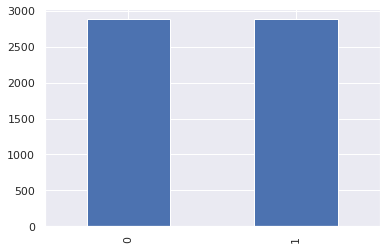

In [45]:
#Balance the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_clean,y,test_size=0.2,random_state=0)

#Balance the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
balCHDPlot=y_train.value_counts().plot(kind='bar')
plt.show()

In [46]:
#X_train.head()
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1669,0.0,47.0,0.0,0.0,0.0,0.0,1.0,0.0,305.0,128.0,92.5,27.64,75.0,62.0
156,0.0,58.0,0.0,0.0,0.0,0.0,1.0,0.0,195.0,153.0,80.5,23.36,60.0,73.0
87,0.0,61.0,1.0,1.0,0.0,0.0,1.0,0.0,326.0,200.0,104.0,38.46,57.0,78.0
685,0.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,215.0,152.5,82.0,25.92,100.0,75.0
666,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0,136.0,92.0,26.24,65.0,71.0


In [47]:
#Print the shape
print('X_train shape :' , X_train.shape)
print('X_test shape :' , X_test.shape)
print('y_train shape :' , y_train.shape)
print('y_test shape is :' , y_test.shape)

X_train shape : (5768, 14)
X_test shape : (848, 14)
y_train shape : (5768,)
y_test shape is : (848,)


In [48]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.130837,1.404206,1.021967,0.036982,-0.225095,-0.114655,-0.825210,5.011180,-0.014982,0.384383,-0.038864,1.146951,-0.081073,1.191372
1,1.130837,0.076846,1.021967,1.700960,-0.225095,-0.114655,-0.825210,-0.210441,-0.399615,-0.154827,-0.199381,-1.259469,-0.854864,-0.233218
2,1.130837,-1.612522,1.021967,0.868971,-0.225095,-0.114655,-0.825210,-0.210441,0.867412,-0.528126,0.201913,0.163682,0.004904,-0.299478
3,-0.995322,-0.285162,-1.046407,-0.795007,5.379832,-0.114655,1.301403,-0.210441,1.342547,-0.237782,0.282171,0.207670,-0.510957,-0.365738
4,-0.995322,-1.371184,-1.046407,-0.795007,-0.225095,-0.114655,-0.825210,-0.210441,-0.648495,-1.108813,-1.162487,-0.793711,0.778694,0.031822


In [49]:
#Re-assign the columns
X_train.columns= X.columns   
X_test.columns= X.columns

y_train.index= X_train.index
y_test.index= X_test.index

In [50]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.130837,1.404206,1.021967,0.036982,-0.225095,-0.114655,-0.825210,5.011180,-0.014982,0.384383,-0.038864,1.146951,-0.081073,1.191372
1,1.130837,0.076846,1.021967,1.700960,-0.225095,-0.114655,-0.825210,-0.210441,-0.399615,-0.154827,-0.199381,-1.259469,-0.854864,-0.233218
2,1.130837,-1.612522,1.021967,0.868971,-0.225095,-0.114655,-0.825210,-0.210441,0.867412,-0.528126,0.201913,0.163682,0.004904,-0.299478
3,-0.995322,-0.285162,-1.046407,-0.795007,5.379832,-0.114655,1.301403,-0.210441,1.342547,-0.237782,0.282171,0.207670,-0.510957,-0.365738
4,-0.995322,-1.371184,-1.046407,-0.795007,-0.225095,-0.114655,-0.825210,-0.210441,-0.648495,-1.108813,-1.162487,-0.793711,0.778694,0.031822


In [51]:
#Defining a function to visualize the confusion matrix
from sklearn.metrics import classification_report
def plot_confusion_matrix(y_test, y_pred, plt_title):
    c_m=confusion_matrix(y_test, y_pred)
    print("\u0332".join('\nClassification Report\n'),'\n', classification_report(y_test, y_pred))
    sns.heatmap(c_m, fmt='g', annot=True, cmap='BuGn')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return c_m

Accuracy Score for Random Forest Classifier:  0.8113207547169812

̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲
 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       710
           1       0.37      0.23      0.29       138

    accuracy                           0.81       848
   macro avg       0.62      0.58      0.59       848
weighted avg       0.78      0.81      0.79       848



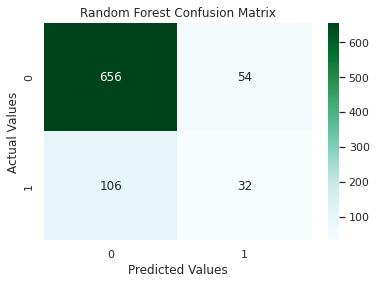

In [52]:
#Implementing RandomForestClassification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 80,
                           max_features= 2,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300,
                           random_state=0)
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
print('Accuracy Score for Random Forest Classifier: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc= plot_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

Accuracy Score for Decision Tree Classifier:  0.722877358490566

̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲
 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       710
           1       0.22      0.28      0.25       138

    accuracy                           0.72       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.72      0.74       848



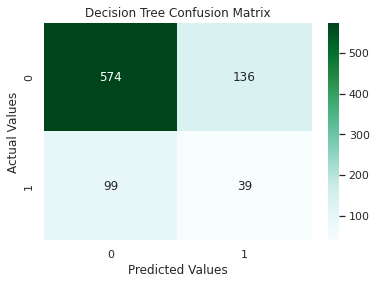

In [53]:
#Implementing DecisionTree model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)
y_pred_dt = tree_reg.predict(X_test)
print('Accuracy Score for Decision Tree Classifier: ',accuracy_score(y_test,y_pred_dt))
cm_dt= plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')

Accuracy Score for Naive Bayes Classification:  0.7983490566037735

̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲
 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       710
           1       0.39      0.41      0.40       138

    accuracy                           0.80       848
   macro avg       0.64      0.64      0.64       848
weighted avg       0.80      0.80      0.80       848



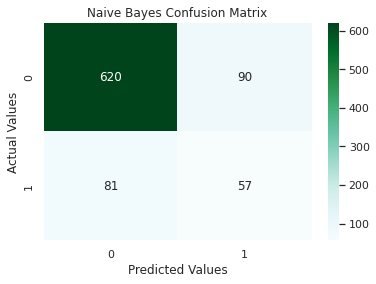

In [54]:
#Implementing Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
y_pred_NB = naiveBayes.predict(X_test)
print('Accuracy Score for Naive Bayes Classification: ',accuracy_score(y_test,y_pred_NB))
cm_NB= plot_confusion_matrix(y_test, y_pred_NB, 'Naive Bayes Confusion Matrix')

